In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/udemy.csv', encoding='utf-16', sep='\t')

In [ ]:
df.head()

,Course Id,Course-Title,Is Paid,Level,Published Date,Pulished Timestamp,Subject,URL1,CONTENT DURATION in HR's,Num Lectures,Price,Reviews,Students
0,1070968,Ultimate Investment Banking Course,Paid,All Levels,18/01/17,30/12/1899 12:58:58 pm,Business Finance,https://www.udemy.com/ultimate-investment-bank...,0.045139,51,$200,23,2147
1,1113822,Complete GST Course & Certification - Grow You...,Paid,All Levels,09/03/17,30/12/1899 8:34:20 am,Business Finance,https://www.udemy.com/goods-and-services-tax/,39.000000,274,$75,923,2792
2,1006314,Financial Modeling for Business Analysts and C...,Paid,Intermediate Level,19/12/16,30/12/1899 11:26:30 am,Business Finance,https://www.udemy.com/financial-modeling-for-b...,2.500000,51,$45,74,2174
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,Paid,All Levels,30/05/17,30/12/1899 1:07:24 am,Business Finance,https://www.udemy.com/complete-excel-finance-c...,3.000000,36,$95,11,2451
4,1011058,How To Maximize Your Profits Trading Options,Paid,Intermediate Level,13/12/16,30/12/1899 6:57:18 am,Business Finance,https://www.udemy.com/how-to-maximize-your-pro...,2.000000,26,$200,45,1276


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3673 entries, 0 to 3672
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Course Id                 3673 non-null   int64  
 1   Course-Title              3673 non-null   object 
 2   Is Paid                   3673 non-null   object 
 3   Level                     3673 non-null   object 
 4   Published Date            3673 non-null   object 
 5   Pulished Timestamp        3673 non-null   object 
 6   Subject                   3673 non-null   object 
 7   URL1                      3673 non-null   object 
 8   CONTENT DURATION in HR's  3673 non-null   float64
 9   Num Lectures              3673 non-null   int64  
 10  Price                     3673 non-null   object 
 11  Reviews                   3673 non-null   int64  
 12  Students                  3673 non-null   int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 373.2+ KB


In [ ]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Course Id                   0
Course-Title                0
Is Paid                     0
Level                       0
Published Date              0
Pulished Timestamp          0
Subject                     0
URL1                        0
CONTENT DURATION in HR's    0
Num Lectures                0
Price                       0
Reviews                     0
Students                    0
dtype: int64


In [ ]:
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 6


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.rename(columns={
    "CONTENT DURATION in HR's": "Content_Duration_hours",
    "Course-Title": "Course_Title",
    "Is Paid": "Is_Paid",
    "Published Date": "Published_Date",
    "Pulished Timestamp": "Published_Timestamp",
    "Num Lectures": "Num_Lectures",
    "Price": "Price_USD"
}, inplace=True)

In [ ]:
df['Price_USD'] = df['Price_USD'].replace('[\$,]', '', regex=True)
df['Price_USD'] = pd.to_numeric(df['Price_USD'], errors='coerce').fillna(0)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-3096544629.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['Price_USD'] = df['Price_USD'].replace('[\$,]', '', regex=True)


In [ ]:
df.drop(columns=['Published_Timestamp'], inplace=True)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3667 entries, 0 to 3672
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Course Id               3667 non-null   int64  
 1   Course_Title            3667 non-null   object 
 2   Is_Paid                 3667 non-null   object 
 3   Level                   3667 non-null   object 
 4   Published_Date          3667 non-null   object 
 5   Subject                 3667 non-null   object 
 6   URL1                    3667 non-null   object 
 7   Content_Duration_hours  3667 non-null   float64
 8   Num_Lectures            3667 non-null   int64  
 9   Price_USD               3667 non-null   int64  
 10  Reviews                 3667 non-null   int64  
 11  Students                3667 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 372.4+ KB
None


In [ ]:
df.head(3)

,Course Id,Course_Title,Is_Paid,Level,Published_Date,Subject,URL1,Content_Duration_hours,Num_Lectures,Price_USD,Reviews,Students
0,1070968,Ultimate Investment Banking Course,Paid,All Levels,18/01/17,Business Finance,https://www.udemy.com/ultimate-investment-bank...,0.045139,51,200,23,2147
1,1113822,Complete GST Course & Certification - Grow You...,Paid,All Levels,09/03/17,Business Finance,https://www.udemy.com/goods-and-services-tax/,39.000000,274,75,923,2792
2,1006314,Financial Modeling for Business Analysts and C...,Paid,Intermediate Level,19/12/16,Business Finance,https://www.udemy.com/financial-modeling-for-b...,2.500000,51,45,74,2174


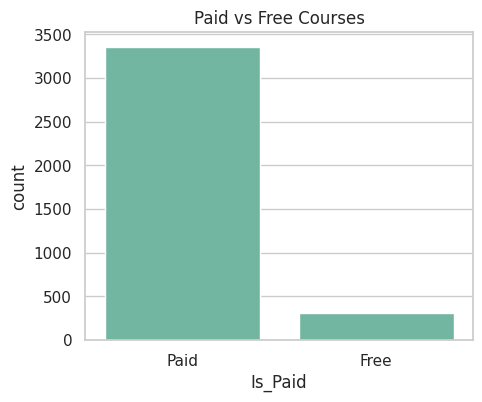

In [ ]:
sns.set(style="whitegrid", palette="Set2")

# 1. Paid vs Free distribution
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='Is_Paid')
plt.title('Paid vs Free Courses')
plt.show()

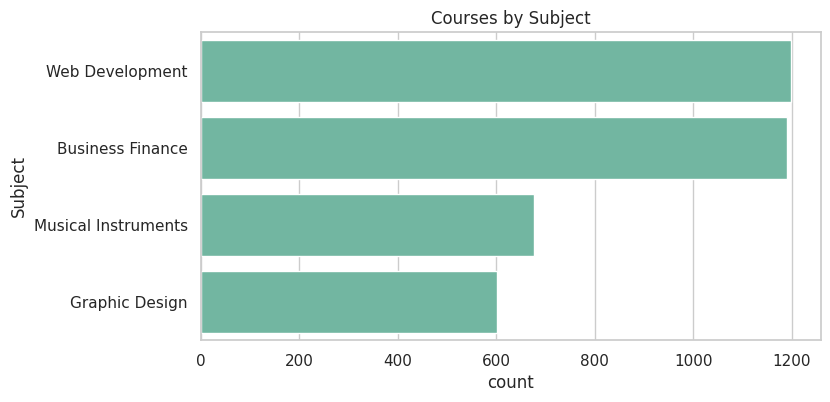

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, y='Subject', order=df['Subject'].value_counts().index)
plt.title('Courses by Subject')
plt.show()

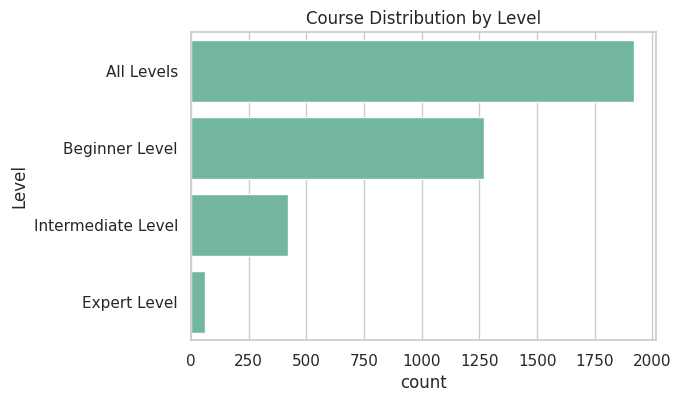

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, y='Level', order=df['Level'].value_counts().index)
plt.title('Course Distribution by Level')
plt.show()

In [ ]:
df[['Content_Duration_hours','Num_Lectures','Price_USD','Reviews','Students']].describe()

,Content_Duration_hours,Num_Lectures,Price_USD,Reviews,Students
count,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000
mean,4.119873,40.136079,66.103082,156.551404,3192.060813
std,6.050489,50.445168,61.058165,936.803791,9494.103073
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.130000,15.000000,20.000000,4.000000,111.000000
50%,2.000000,25.000000,45.000000,18.000000,912.000000
75%,4.500000,46.000000,95.000000,67.000000,2545.000000
max,78.500000,779.000000,200.000000,27445.000000,268923.000000


In [ ]:
paid_summary = df.groupby('Is_Paid')[['Price_USD','Students','Reviews','Content_Duration_hours']].mean().round(2)
print("Average metrics by Paid vs Free:")
print(paid_summary, "\n")

Average metrics by Paid vs Free:
         Price_USD  Students  Reviews  Content_Duration_hours
Is_Paid                                                      
Free          0.00  11561.46   427.27                    2.25
Paid         72.19   2421.92   131.64                    4.29 



In [ ]:
subject_summary = df.groupby('Subject')[['Students','Reviews']].sum().sort_values('Students', ascending=False)
print("Total Students and Reviews by Subject:")
print(subject_summary)

Total Students and Reviews by Subject:
                     Students  Reviews
Subject                               
Web Development       7937287   429500
Business Finance      1865676    75890
Graphic Design        1063148    37070
Musical Instruments    839176    31614


In [ ]:
df_export = df.drop(columns=['URL1'])

In [ ]:
df_export.to_csv("Udemy_Cleaned.csv", index=False)

print("✅ Cleaned dataset saved as Udemy_Cleaned.csv")
print(df_export.shape)

✅ Cleaned dataset saved as Udemy_Cleaned.csv
(3667, 11)
